Mileage Prediction(Regression Analysis)

---



Objective: To predict Miles per gallon of a car based on it's different features

Data Source: 
StatLib library - Carnegie Mellon University

Attribute Information:
1. mpg:Continuous
2. cylinders:multi valued discrete
3. displacement:continuous
4. horsepower:continuous
5. weight:continuous
6. acceleration:continuous
7. model year:multi-valued discrete
8. origin:multi-valued discrete
9. car name:string(unique for each instance)

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

Import data

In [ ]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Describe data

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Data Visualization

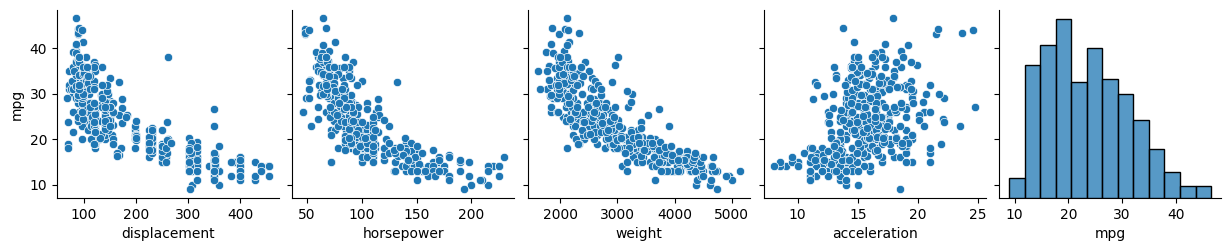

In [ ]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

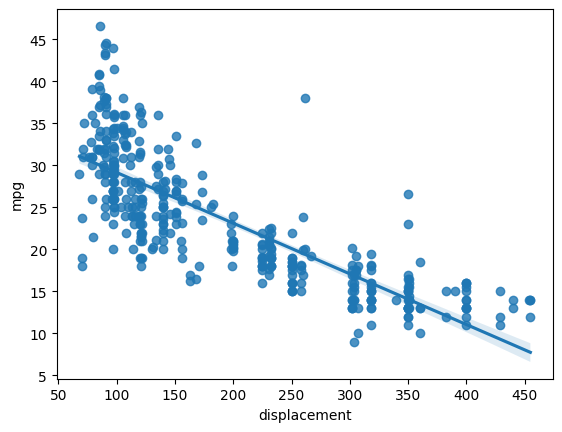

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df);

Data Preprocessing





remove missing values

In [ ]:
df=df.dropna()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

Define Target Variable (y) and Feature Variables (X)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

Scaling data

In [ ]:
X=ss.fit_transform(X)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=2529)


Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Predict Test Data

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


In [ ]:
mean_absolute_error(y_test,y_pred)

3.2128193572784176

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14486145216628085

In [ ]:
r2_score(y_test,y_pred)

0.7174961864188241

Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred2=rf.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred2)

2.610765306122449

In [ ]:
mean_absolute_percentage_error(y_test,y_pred2)

0.11104046175426673

In [ ]:
r2_score(y_test,y_pred2)

0.7622167414164536